Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут - https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:

satisfaction_level - Уровень удовлетворенности работой\
Last_evaluation - Время с момента последней оценки в годах\
number_projects - Количество проектов, выполненных за время работы\
average_monthly_hours - Среднее количество часов на рабочем месте в месяц\
time_spend_company - Стаж работы в компании в годах\
work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником\
left - уволился ли сотрудник\
promotion_last_5years - повышался ли сотрудник за последние пять лет\
department - отдел в котором работает сотрудник\
salary - относительный уровень зарплаты\

In [4]:
import pandas as pd

1) Загрузите файл HR.csv в pandas dataframe - 5 баллов

In [9]:
hr_df= pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


2) Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение) - 10 баллов

In [11]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [13]:
#Мода
hr_df_mode = hr_df.mode().reset_index()
hr_df_mode_stat = hr_df_mode[(hr_df_mode['index'] == 0)]
hr_df_mode_stat

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


3)Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные. - 10 баллов

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

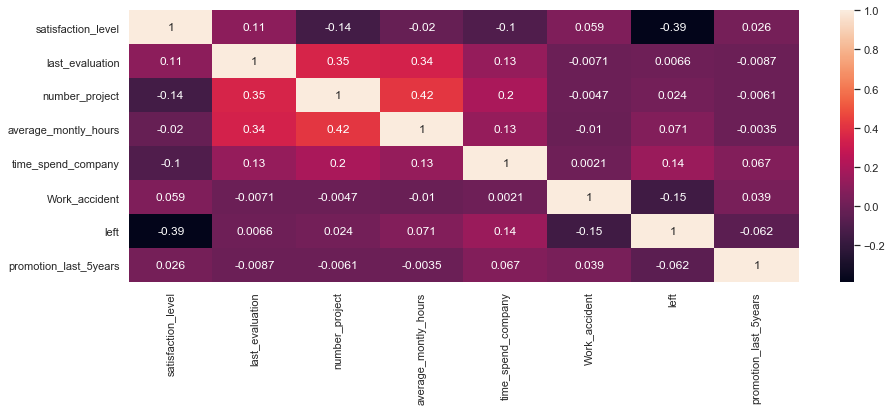

In [91]:
sb.set(rc={'figure.figsize':(15,5)})
sb.heatmap(hr_df.corr(), annot=True)

Данная матрица отражает совокупность корреляций. Сделаем на ее примере выводы о взаимосвязях следующих переменных:

Обратная зависимость между удовлетворенностью работой и увольнениями.
Прямая зависимость между средним отработанным временем и последней оценкой.
Зависимость между № проекта и последней оценкой, а также номером проекта и средним отработанным временем.

4) Рассчитайте сколько сотрудников работает в каждом департаменте - 5 баллов

In [16]:
number_employees=hr_df['department'].value_counts()
number_employees

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

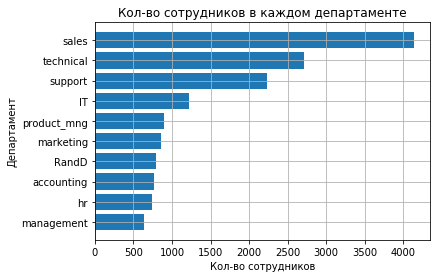

In [24]:
department = hr_df.groupby(['department']).agg({'number_project':['count']})
department.columns = ['people']
department = department.sort_values('people',ascending = True)
plt.barh(names_dep.index, names_dep['people'])
plt.xlabel('Кол-во сотрудников')
plt.ylabel('Департамент')
plt.title('Кол-во сотрудников в каждом департаменте')
plt.grid()

5) Показать распределение сотрудников по зарплатам - 5 баллов

In [25]:
hr_df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

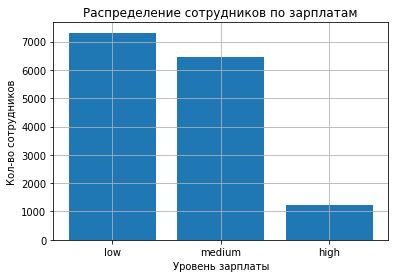

In [28]:
salary_levels = hr_df['salary'].value_counts().reset_index()
plt.bar(salary_levels['index'], salary_levels['salary'])
plt.xlabel('Уровень зарплаты')
plt.ylabel('Кол-во сотрудников')
plt.title('Распределение сотрудников по зарплатам')
plt.grid()

6) Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности - 5 баллов

In [29]:
deportation_staf_salary = hr_df.groupby(['department', 'salary']).agg({'salary':['count']})
deportation_staf_salary

salary
                    count
department  salary       
IT          high       83
            low       609
            medium    535
RandD       high       51
            low       364
            medium    372
accounting  high       74
            low       358
            medium    335
hr          high       45
            low       335
            medium    359
management  high      225
            low       180
            medium    225
marketing   high       80
            low       402
            medium    376
product_mng high       68
            low       451
            medium    383
sales       high      269
            low      2099
            medium   1772
support     high      141
            low      1146
            medium    942
technical   high      201
            low      1372
            medium   1147

Text(0, 0.5, 'Количество сотрудников')

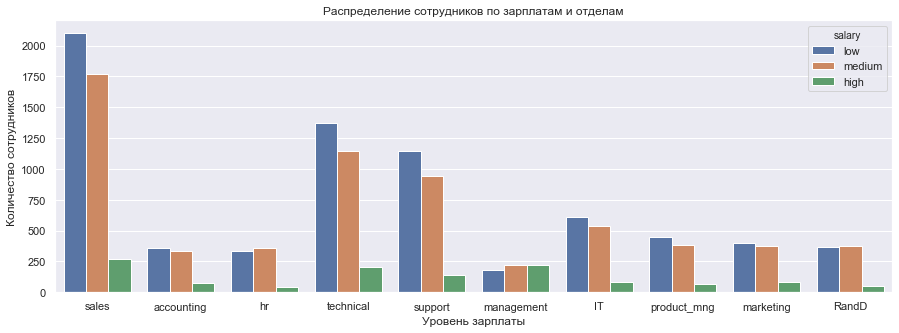

In [156]:
plt.figure(figsize=(15, 5))
sb.countplot(x = 'department', hue = 'salary', data = hr_df)
plt.title('Распределение сотрудников по зарплатам и отделам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')

7) Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом - 10 баллов

H0 - Сотрудники с высокими и низким окладом работают одинково

H1 - Cотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [54]:
df_high=hr_df[(hr_df['salary']=='high')] 
df_low=hr_df[(hr_df['salary']=='low')]

In [55]:
from scipy import stats as st

In [63]:
df_high_a = hr_df[hr_df['salary']=='high']
df_high_a.mean()

satisfaction_level         0.637470
last_evaluation            0.704325
number_project             3.767179
average_montly_hours     199.867421
time_spend_company         3.692805
Work_accident              0.155214
left                       0.066289
promotion_last_5years      0.058205
dtype: float64

In [67]:
df_low_a = hr_df[hr_df['salary']=='low']
df_low_a.mean()

satisfaction_level         0.600753
last_evaluation            0.717017
number_project             3.799891
average_montly_hours     200.996583
time_spend_company         3.438218
Work_accident              0.142154
left                       0.296884
promotion_last_5years      0.009021
dtype: float64

In [72]:
a = 0.05
result = st.ttest_ind(df_high['average_montly_hours'], df_low['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < a):
    print('Отвергаем H0, Cотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Не отвергаем H0, Сотрудники с высокими и низким окладом работают одинково')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем H0, Сотрудники с высокими и низким окладом работают одинково


In [73]:
hr_df.groupby(['salary']).agg({'average_montly_hours':['mean']})

,average_montly_hours
,mean
salary,
high,199.867421
low,200.996583
medium,201.338349


Text(0.5, 1.0, 'Распределение рабочего времени')

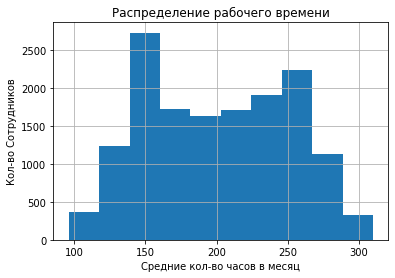

In [77]:
data = hr_df[['department','salary','average_montly_hours']]
data.average_montly_hours.hist()
plt.xlabel('Средние кол-во часов в месяц')
plt.ylabel('Кол-во Сотрудников')
plt.title('Распределение рабочего времени')

8) Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):     - 10 баллов
    
    Доля сотрудников с повышением за последние 5 лет
    Средняя степень удовлетворенности
    Среднее количество проектов

In [82]:
# Сформируем таблицу с уволившимися сотрудниками
employees_quit = hr_df[hr_df['left'] == 1]
employees_quit.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [83]:
employees_quit.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [100]:
#Доля сотрудников с повышением за последние 5 лет
employees_quit.loc[employees_quit['promotion_last_5years'] == 1].count()[0]/employees_quit.count()[0]

0.005320638476617194

In [88]:
print(f' Средняя степень удовлетворенности {employees_quit.satisfaction_level.mean()}')

 Средняя степень удовлетворенности 0.44009801176140917


In [89]:
print(f' Среднее количество проектов {employees_quit.number_project.mean()}')

 Среднее количество проектов 3.8555026603192384


In [103]:
# Сформируем таблицу по оставшимся в компании сотрудникам

stayed_work = hr_df[hr_df['left'] == 0]
stayed_work.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [104]:
stayed_work.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


In [108]:
#Доля сотрудников с повышением за последние 5 лет
stayed_work.loc[stayed_work['promotion_last_5years'] == 1].count()[0]/stayed_work.count()[0]

0.026251312565628283

In [109]:
print(f' Средняя степень удовлетворенности {stayed_work.satisfaction_level.mean()}')

 Средняя степень удовлетворенности 0.666809590479516


In [110]:
print(f' Среднее количество проектов {stayed_work.number_project.mean()}')

 Среднее количество проектов 3.786664333216661


Итог:
Доля сотрудников с повышением за последние 5 лет \
0.0053 - уволившиеся сотрудники\
0.0260 - оставшиеся на работе\
Средняя степень удовлетворенности\
0.44 - уволившиеся сотрудники\
0.66 - оставшиеся на работе\
Среднее количество проектов\
3.85 - уволившиеся сотрудники\
3.78 - оставшиеся на работе\

Сотрудники которые удовлетворены своей работой, чаще получают свою повышение, хотя проектов выполяют практически так же.
Тут надо разбираться, может они удовлетворены своей работой потому, что повышали.

9) Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки  - 20 баллов

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [124]:
hr_df_lda=hr_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]

In [125]:
hr_df_lda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [126]:
data_train, data_test = train_test_split(hr_df_lda, test_size=0.2)
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [127]:
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
9755,0.67,0.70,4,222,3,0,0
1026,0.46,0.53,2,129,3,0,0
4528,0.80,0.77,4,205,2,0,0
8902,0.48,0.51,4,201,4,0,0
5212,0.50,0.54,3,134,3,0,0
...,...,...,...,...,...,...,...
4516,0.89,0.49,5,165,6,0,0
10505,0.80,0.58,4,189,2,0,0
11618,0.49,0.94,4,175,3,0,0
3542,0.83,0.57,3,232,4,0,0


In [128]:
lda = LinearDiscriminantAnalysis()

In [129]:
lda.fit(data_train, y_train)
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,1


In [131]:
y_true = result[0]
y_pred = result[1]
confusion_matrix(y_true, y_pred)

array([[2132,  179],
       [ 504,  185]], dtype=int64)

Значительная погрешность модели. Нужно разбираться.

10) Загрузить jupyter notebook с решение на github и прислать ссылку  - 5 баллов

ок)